<a href="https://colab.research.google.com/github/Kanav-Jain/Deep-Learning-Models/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config = configuration)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from tensorflow.keras.datasets import mnist

In [77]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [78]:
x_train.shape

(60000, 28, 28)

In [79]:
x_test.shape

(10000, 28, 28)

In [80]:
y_train.shape

(60000,)

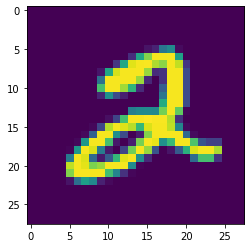

In [81]:
plt.imshow(x_train[5])

In [82]:
num_labels = len(np.unique(y_train))

In [83]:
num_labels

10

In [84]:
from tensorflow.keras.utils import to_categorical

In [85]:
y_train = to_categorical(y_train)

In [30]:
y_test = to_categorical(y_test)

In [31]:
image_size = x_train.shape[1]
image_size

28

In [32]:
input_size = image_size **2
input_size

784

In [33]:
x_train = np.reshape(x_train, [-1,input_size])

In [35]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [37]:
x_test = np.reshape(x_test, [-1,input_size])

In [39]:
x_train.shape

(60000, 784)

In [41]:
x_train = x_train.astype('float32')/255

In [42]:
x_test = x_test.astype('float32')/255

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [47]:
classifier = Sequential()

In [49]:
classifier.add(Dense(input_dim = input_size, units = 256,
                     kernel_initializer = 'uniform', activation='relu'))

In [50]:
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', 
                     activation='relu'))

In [51]:
classifier.add(Dense(units = num_labels, kernel_initializer = 'uniform', 
                     activation='softmax'))

In [53]:
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [56]:
results = classifier.fit(x_train,y_train, batch_size = 120, epochs = 20)

Epoch 1/20
500/500 [==============================] - 17s 6ms/step - loss: 0.6143 - accuracy: 0.8378
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 0.1283 - accuracy: 0.9619
Epoch 3/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0776 - accuracy: 0.9765
Epoch 4/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0567 - accuracy: 0.9826
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0411 - accuracy: 0.9869
Epoch 6/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0294 - accuracy: 0.9913
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0229 - accuracy: 0.9932
Epoch 8/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 9/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 10/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0134 - accuracy: 0.995

In [57]:
accuracy = results.history['accuracy']

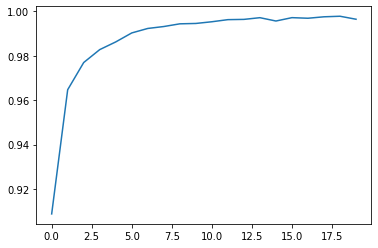

In [58]:
plt.plot(accuracy)

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [71]:
y_pred = classifier.predict(x_test)

In [72]:
y_pred

array([[1.86850088e-13, 1.55770345e-11, 3.68541742e-12, ...,
        1.00000000e+00, 1.79592262e-13, 1.86672011e-09],
       [1.06993670e-17, 1.50303085e-05, 9.99984980e-01, ...,
        1.38863746e-16, 1.14787716e-20, 4.93035562e-27],
       [8.01574315e-14, 9.99999523e-01, 2.29102493e-09, ...,
        1.93334927e-07, 2.29971974e-07, 7.38558994e-14],
       ...,
       [1.57808625e-19, 1.23933121e-17, 1.59887469e-21, ...,
        1.14580722e-13, 1.79755109e-16, 1.73082620e-12],
       [9.69686125e-20, 2.42383950e-23, 6.83749039e-22, ...,
        2.53757143e-19, 3.10790944e-13, 1.91491795e-20],
       [8.66857210e-19, 1.71359852e-18, 3.54200750e-16, ...,
        9.13365737e-25, 2.77011776e-16, 1.04780126e-26]], dtype=float32)

In [73]:
y_pred[0]

array([1.8685009e-13, 1.5577034e-11, 3.6854174e-12, 5.6573773e-10,
       2.3109922e-15, 9.0666840e-12, 3.1359771e-22, 1.0000000e+00,
       1.7959226e-13, 1.8667201e-09], dtype=float32)

In [74]:
y_pred = np.argmax(y_pred,axis = 1)

In [76]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

